<a href="https://colab.research.google.com/github/EmamulHossen/K-Means_Cluster/blob/main/K_MeansCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Module**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/mall customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Drop the Customer ID
df=df.drop("CustomerID",axis=1)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Rename the Column Name
df=df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [ ]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df1=df.copy()
df2=df.copy()

In [ ]:
df.shape

(200, 4)

# **Statistical Describe**

In [ ]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# **Visualization using Matploptlib**

Text(0.5, 1.0, 'Age VS Income plot')

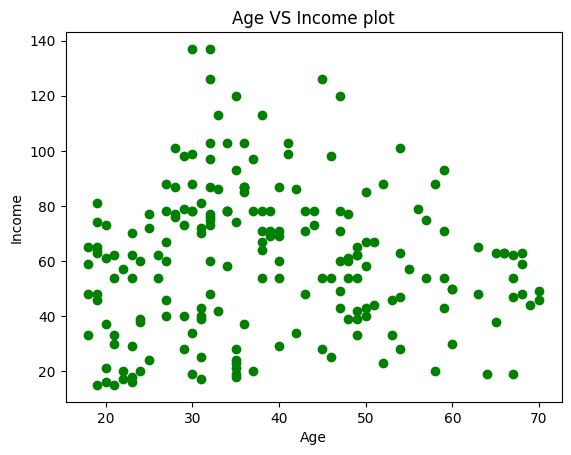

In [ ]:
plt.scatter(df.age,df.income,color='green')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age VS Income plot")

Text(0.5, 1.0, 'score VS Income plot')

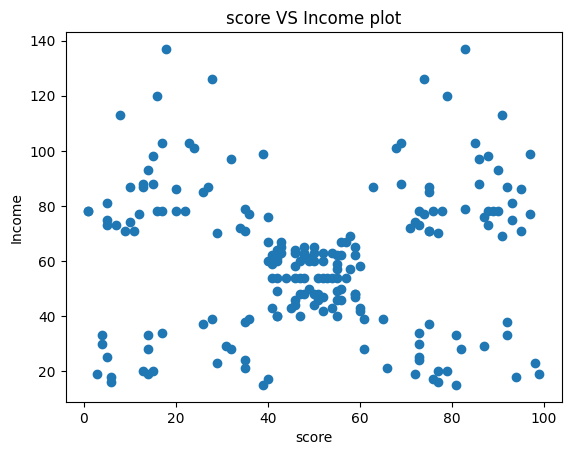

In [ ]:
plt.scatter(df.score,df.income)
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

# **Pairplot**

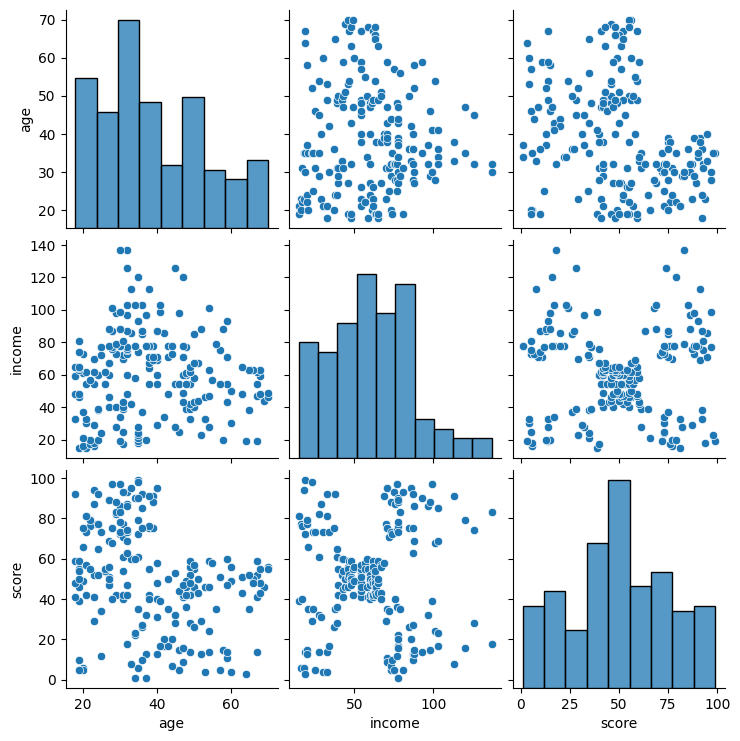

In [ ]:
sns.pairplot(df[['age','income','score']])

**Cluster income & Score**

Text(0.5, 1.0, 'score VS Income plot')

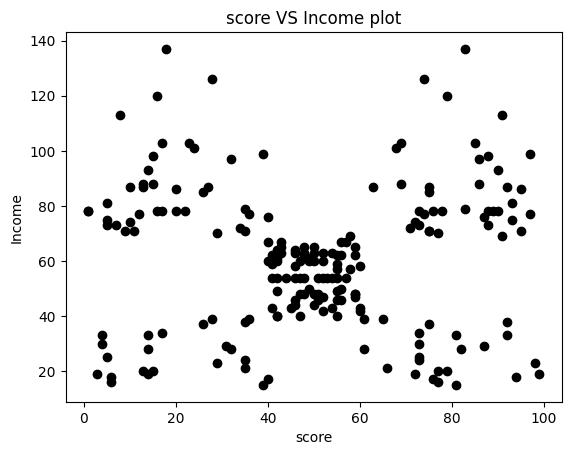

In [ ]:
plt.scatter(df.score,df.income,color="black")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

# **K-Means Cluster**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km=KMeans() #Creating KMeans object

In [ ]:
km.fit(df[['score','income']]) #fit -> traing the ml model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
km.predict(df[['score','income']])

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 0, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 0, 3, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 4, 6, 2, 6, 4, 6, 4, 6,
       2, 6, 4, 6, 4, 6, 4, 6, 4, 6, 2, 6, 4, 6, 2, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 2, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1,
       7, 1], dtype=int32)

In [ ]:
df['new_cluster']=km.predict(df[['score','income']])

In [ ]:
df.head()

,gender,age,income,score,new_cluster
0,Male,19,15,39,5
1,Male,21,15,81,3
2,Female,20,16,6,5
3,Female,23,16,77,3
4,Female,31,17,40,5


**Visualization**

In [ ]:
df0=df[df.new_cluster==0]

In [ ]:
df0.head()

,gender,age,income,score,new_cluster
27,Male,35,28,61,0
40,Female,65,38,35,0
42,Male,48,39,36,0
43,Female,31,39,61,0
45,Female,24,39,65,0


In [ ]:
df0.shape

(39, 5)

Text(0.5, 1.0, 'score VS Income plot')

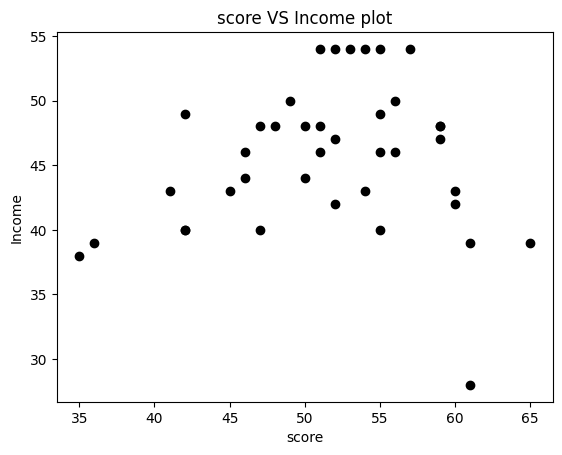

In [ ]:
plt.scatter(df0.score,df0.income,color="black")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

In [ ]:
df1=df[df.new_cluster==1]

In [ ]:
df1.head()

,gender,age,income,score,new_cluster
179,Male,35,93,90,1
181,Female,32,97,86,1
183,Female,29,98,88,1
185,Male,30,99,97,1
187,Male,28,101,68,1


In [ ]:
df1.shape

(11, 5)

Text(0.5, 1.0, 'score VS Income plot')

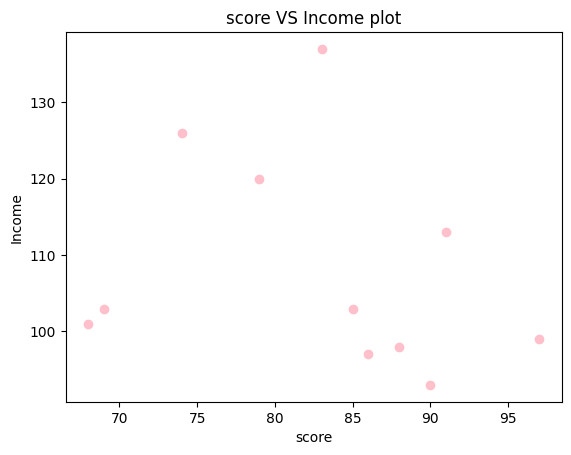

In [ ]:
plt.scatter(df1.score,df1.income,color="Pink",label="Cluster1")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

In [ ]:
df2=df[df.new_cluster==2]

In [ ]:
df2.head()

,gender,age,income,score,new_cluster
74,Male,59,54,47,2
77,Male,40,54,48,2
79,Female,49,54,42,2
82,Male,67,54,41,2
83,Female,46,54,44,2


In [ ]:
df2.shape

(48, 5)

Text(0.5, 1.0, 'score VS Income plot')

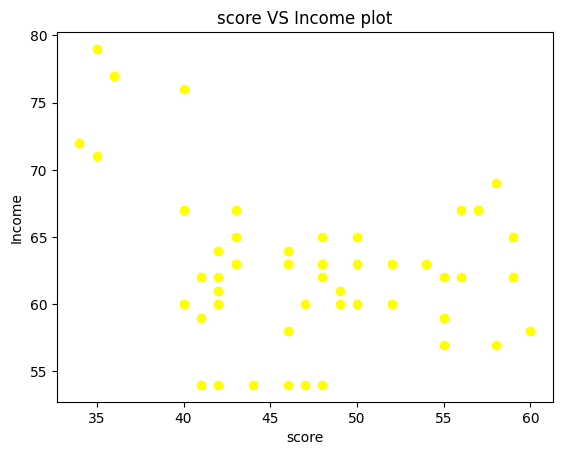

In [ ]:
plt.scatter(df2.score,df2.income,color="yellow",label="Cluster2")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

In [ ]:
df3=df[df.new_cluster==3]

In [ ]:
df3.head()

,gender,age,income,score,new_cluster
1,Male,21,15,81,3
3,Female,23,16,77,3
5,Female,22,17,76,3
7,Female,23,18,94,3
9,Female,30,19,72,3


In [ ]:
df3.shape

(20, 5)

Text(0.5, 1.0, 'score VS Income plot')

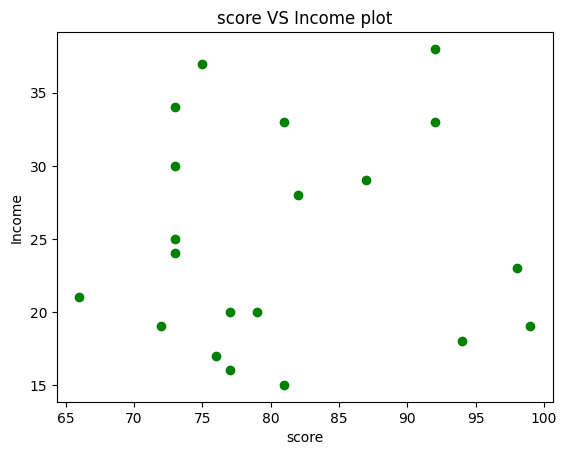

In [ ]:
plt.scatter(df3.score,df3.income,color="green",label="Cluster3")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

In [ ]:
df4=df[df.new_cluster==4]

In [ ]:
df4.head()

,gender,age,income,score,new_cluster
124,Female,23,70,29,4
128,Male,59,71,11,4
130,Male,47,71,9,4
134,Male,20,73,5,4
136,Female,44,73,7,4


In [ ]:
df4.shape

(23, 5)

Text(0.5, 1.0, 'score VS Income plot')

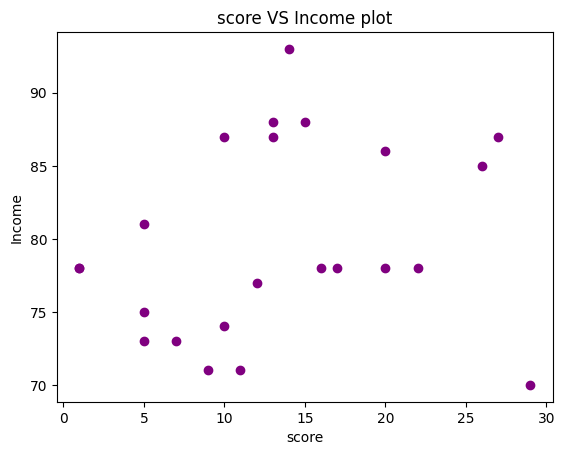

In [ ]:
plt.scatter(df4.score,df4.income,color="purple")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

In [ ]:
df5=df[df.new_cluster==5]

In [ ]:
df5.head()

,gender,age,income,score,new_cluster
0,Male,19,15,39,5
2,Female,20,16,6,5
4,Female,31,17,40,5
6,Female,35,18,6,5
8,Male,64,19,3,5


In [ ]:
df5.shape

(21, 5)

Text(0.5, 1.0, 'score VS Income plot')

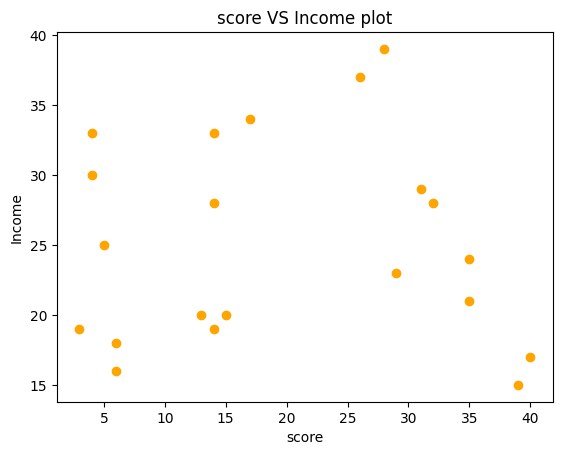

In [ ]:
plt.scatter(df5.score,df5.income,color="orange")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

In [ ]:
df6=df[df.new_cluster==6]

In [ ]:
df6.head()

,gender,age,income,score,new_cluster
123,Male,39,69,91,6
125,Female,31,70,77,6
127,Male,40,71,95,6
129,Male,38,71,75,6
131,Male,39,71,75,6


In [ ]:
df6.shape

(28, 5)

Text(0.5, 1.0, 'score VS Income plot')

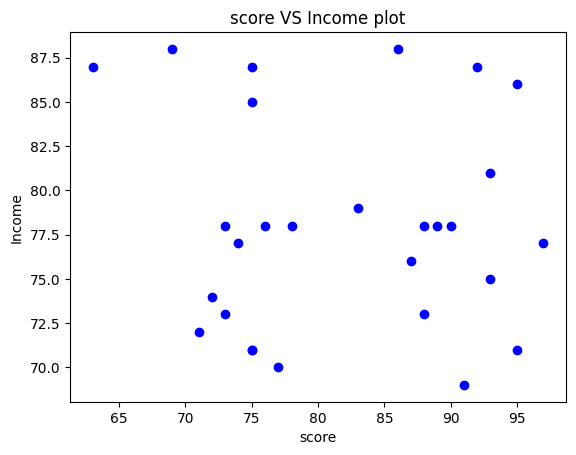

In [ ]:
plt.scatter(df6.score,df6.income,color="blue")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

In [ ]:
df7=df[df.new_cluster==7]

In [ ]:
df7.head()

,gender,age,income,score,new_cluster
180,Female,37,97,32,7
182,Male,46,98,15,7
184,Female,41,99,39,7
186,Female,54,101,24,7
188,Female,41,103,17,7


In [ ]:
df7.shape

(10, 5)

Text(0.5, 1.0, 'score VS Income plot')

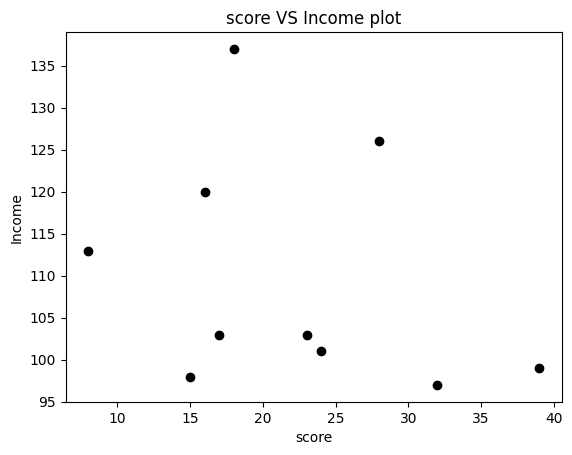

In [ ]:
plt.scatter(df7.score,df7.income,color="black")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

In [ ]:
df8=df[df.new_cluster==8]

In [ ]:
df8.head()

,gender,age,income,score,new_cluster


In [ ]:
df8.shape

(0, 5)

Text(0.5, 1.0, 'score VS Income plot')

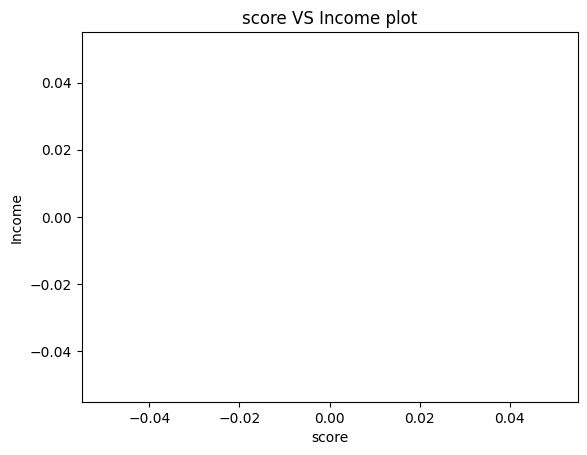

In [ ]:
plt.scatter(df8.score,df8.income,color="black")
plt.xlabel("score")
plt.ylabel("Income")
plt.title("score VS Income plot")

<function matplotlib.pyplot.show(close=None, block=None)>

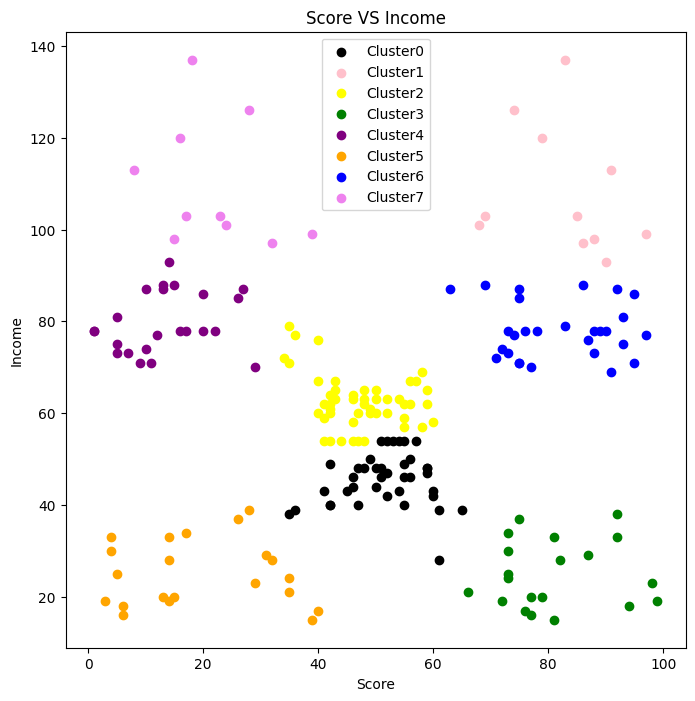

In [ ]:
df0=df[df.new_cluster==0]
df1=df[df.new_cluster==1]
df2=df[df.new_cluster==2]
df3=df[df.new_cluster==3]
df4=df[df.new_cluster==4]
df5=df[df.new_cluster==5]
df6=df[df.new_cluster==6]
df7=df[df.new_cluster==7]


plt.figure(figsize=(8,8))


plt.scatter(df0.score,df0.income,color="black",label="Cluster0")
plt.scatter(df1.score,df1.income,color="pink",label="Cluster1")
plt.scatter(df2.score,df2.income,color="yellow",label="Cluster2")
plt.scatter(df3.score,df3.income,color="green",label="Cluster3")
plt.scatter(df4.score,df4.income,color="purple",label="Cluster4")
plt.scatter(df5.score,df5.income,color="orange",label="Cluster5")
plt.scatter(df6.score,df6.income,color="blue",label="Cluster6")
plt.scatter(df7.score,df7.income,color="violet",label="Cluster7")



plt.xlabel("Score")
plt.ylabel("Income")
plt.title("Score VS Income")
plt.legend()
plt.show

In [ ]:
center=km.cluster_centers_

In [ ]:
center

array([[ 51.51282051,  45.51282051],
       [ 82.72727273, 108.18181818],
       [ 47.29166667,  62.58333333],
       [ 81.        ,  24.95      ],
       [ 13.39130435,  79.73913043],
       [ 19.52380952,  25.14285714],
       [ 81.89285714,  78.03571429],
       [ 22.        , 109.7       ]])

<function matplotlib.pyplot.show(close=None, block=None)>

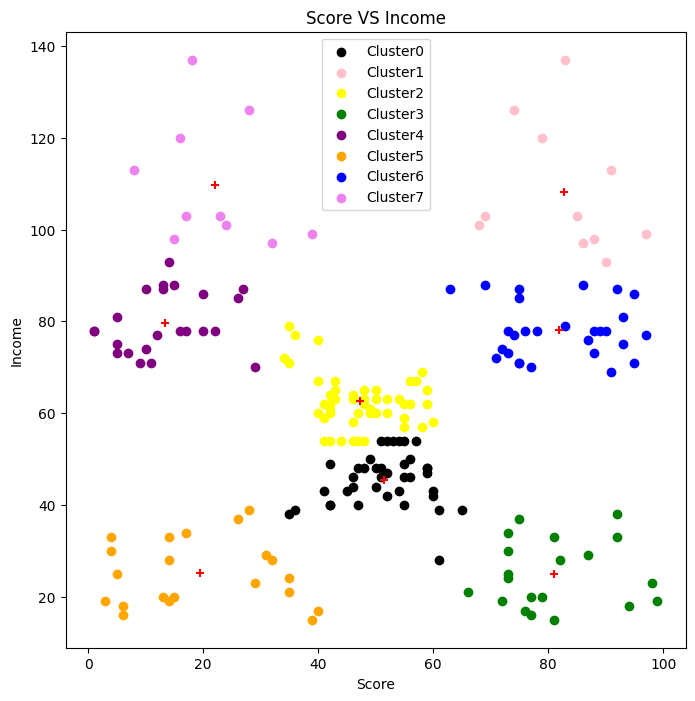

In [ ]:
df0=df[df.new_cluster==0]
df1=df[df.new_cluster==1]
df2=df[df.new_cluster==2]
df3=df[df.new_cluster==3]
df4=df[df.new_cluster==4]
df5=df[df.new_cluster==5]
df6=df[df.new_cluster==6]
df7=df[df.new_cluster==7]


plt.figure(figsize=(8,8))


plt.scatter(df0.score,df0.income,color="black",label="Cluster0")
plt.scatter(df1.score,df1.income,color="pink",label="Cluster1")
plt.scatter(df2.score,df2.income,color="yellow",label="Cluster2")
plt.scatter(df3.score,df3.income,color="green",label="Cluster3")
plt.scatter(df4.score,df4.income,color="purple",label="Cluster4")
plt.scatter(df5.score,df5.income,color="orange",label="Cluster5")
plt.scatter(df6.score,df6.income,color="blue",label="Cluster6")
plt.scatter(df7.score,df7.income,color="violet",label="Cluster7")

plt.scatter(center[:,0],center[:,1],color="red",marker="+")

plt.xlabel("Score")
plt.ylabel("Income")
plt.title("Score VS Income")
plt.legend()
plt.show

# **Optimizing K-Means**

In [ ]:
wcss=[]  #Taking empty list
cluster_range=range(1,15)

for k in cluster_range:
  km2=KMeans(n_clusters=k)
  km2.fit(df[['score','income']])
  wcss.append(km2.inertia_)#Inertia is the wcss value



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37442.247450375704,
 30259.65720728547,
 25009.79892943138,
 21850.165282585636,
 19999.38258827042,
 17602.19046838677,
 16056.61573720397,
 14320.918182339483,
 12775.343451156685]

Text(0.5, 1.0, 'Elbow Method')

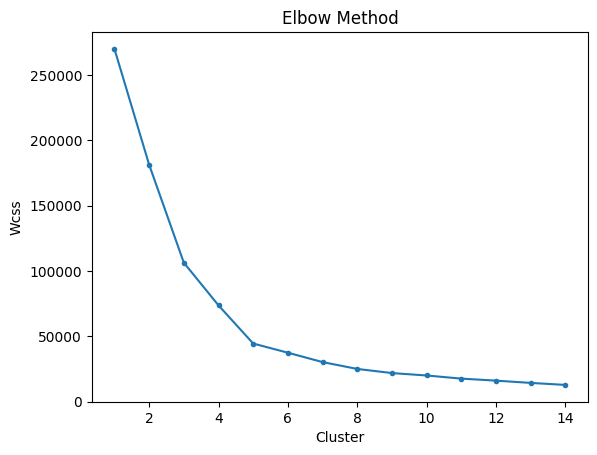

In [ ]:
plt.plot(cluster_range,wcss,marker='.')
plt.ylabel("Wcss")
plt.xlabel("Cluster")

plt.title("Elbow Method")

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(cluster_range,wcss,curve="convex",direction='decreasing')

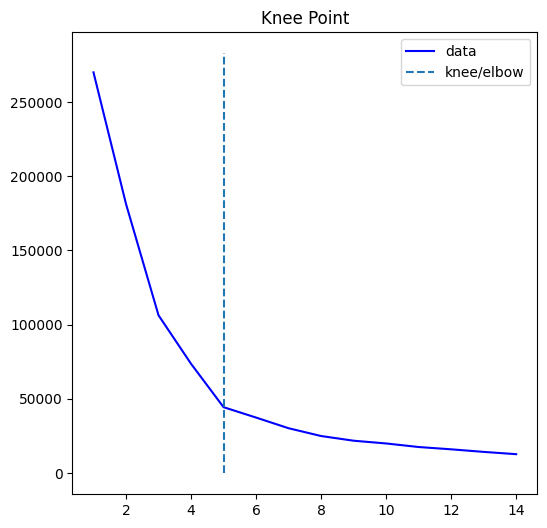

In [ ]:
kl.plot_knee()

In [ ]:
kl.knee

5

# **After Optimizing**

In [ ]:
km3=KMeans(n_clusters=5)